# Visualiseringar

### Inläsning och rensning av data


In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import re
import warnings
import datetime

warnings.filterwarnings('ignore')

SE, DK, NO, FI = 'SE', 'DK', 'NO', 'FI'

def remove_currency(text):
    return re.findall(r'\d+', text.strip())[0]


def create_df(country):
    filename = f"video_{country}_2023.xlsx"
    df = pd.read_excel(filename)
    index = pd.read_excel("index.xlsx", sheet_name=country)
    df = df.dropna(axis=0, subset=['ID'])
    df['Dates'] = pd.to_datetime(df['Dates'])
    df["ID"] = df["ID"].astype(int)
    df = df[["ID", "Dates", "Price"]]
    df = df.merge(index, on="ID", how="left")
    df['month'] = df['Dates'].dt.strftime('%b')
    df["Price"] = df["Price"].apply(remove_currency)
    df['Price']=df['Price'].astype(float)
    df = df.dropna()
    return df

## Sverige

In [217]:
df = create_df(SE)

### Med Sport

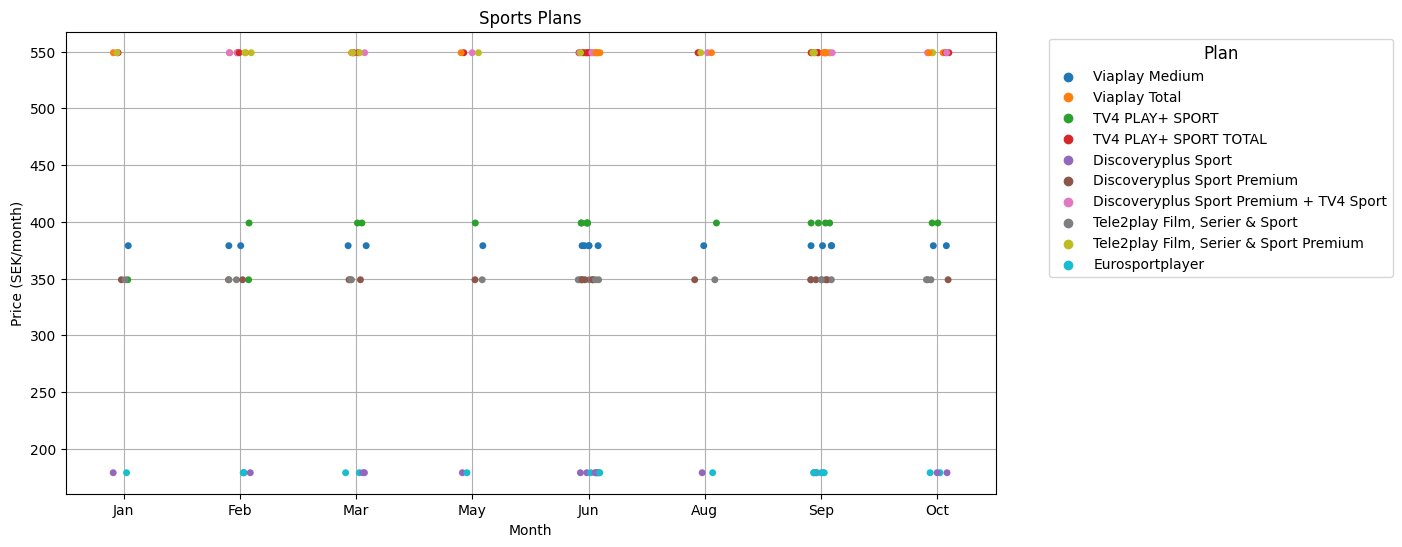

In [218]:
contains_sport = df['Package'].str.contains('sport', case=False)
is_vp_med = df['ID'] == 128
is_vp_tot = df['ID'] == 129
sports = contains_sport | is_vp_med | is_vp_tot
sport_df = df[sports]
fig = plt.figure(figsize=(12, 6))
sns.stripplot(data=sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
#sns.lineplot(data=sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.title('Sports Plans')
plt.xlabel('Month')
plt.ylabel('Price (SEK/month)')
plt.grid(True)
plt.show()
   

### Utan Sport

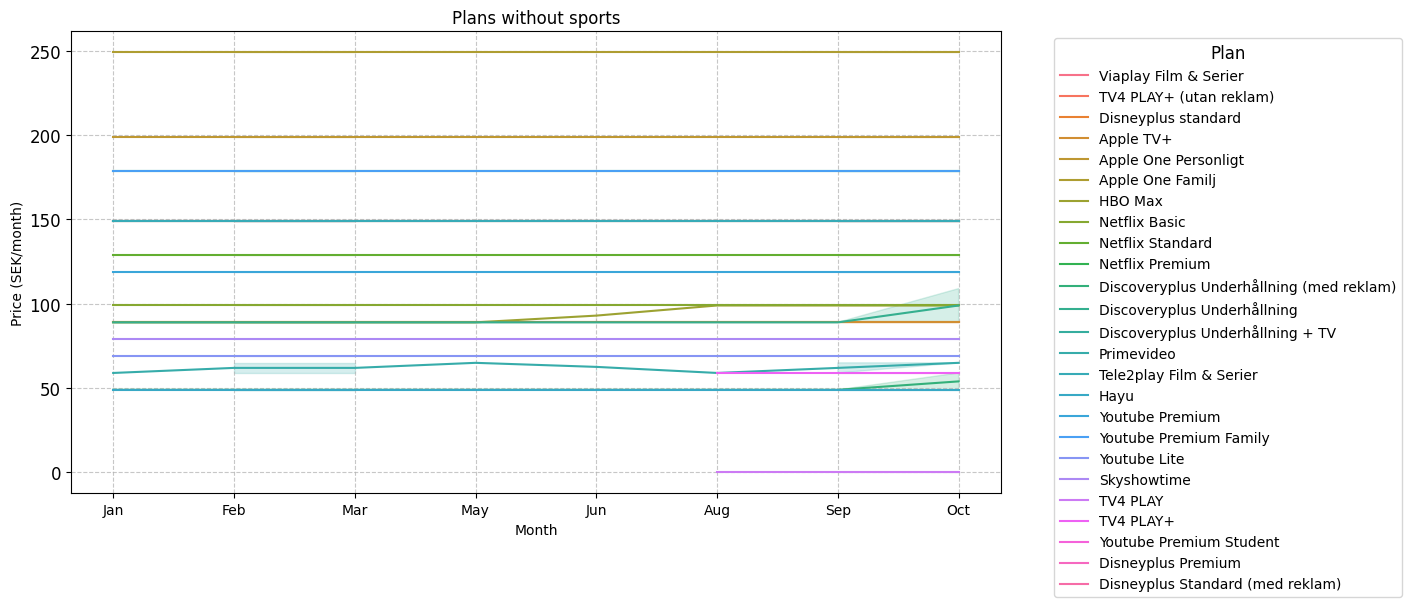

In [219]:
non_month_packages = [124, 137, 118, 116, 136, 140]
no_sport_df = df[~sports & ~df["ID"].isin(non_month_packages)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=no_sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Plans without sports')
plt.xlabel('Month')
plt.ylabel('Price (SEK/month)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Baspaket

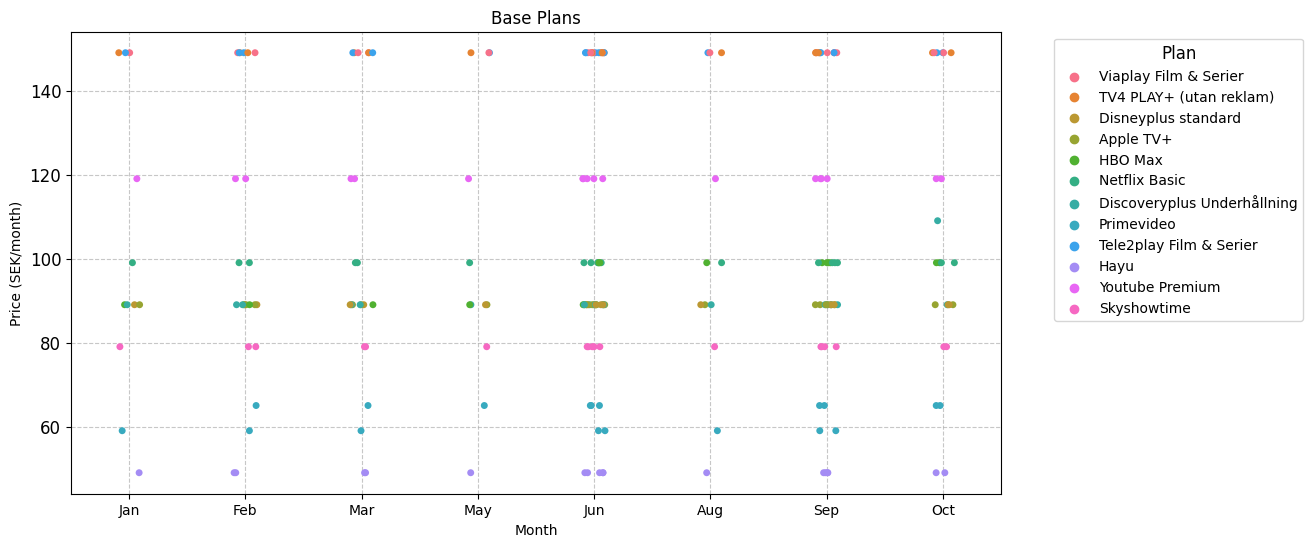

In [220]:
base_packages = [
    101,
    106,
    110,
    115,
    117,
    119,
    123,
    122,
    125,
    130,
    131,
    135
]

base_df = df[df['ID'].isin(base_packages)]
plt.figure(figsize=(12, 6))
sns.stripplot(data=base_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Base Plans')
plt.xlabel('Month')
plt.ylabel('Price (SEK/month)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Årsplaner

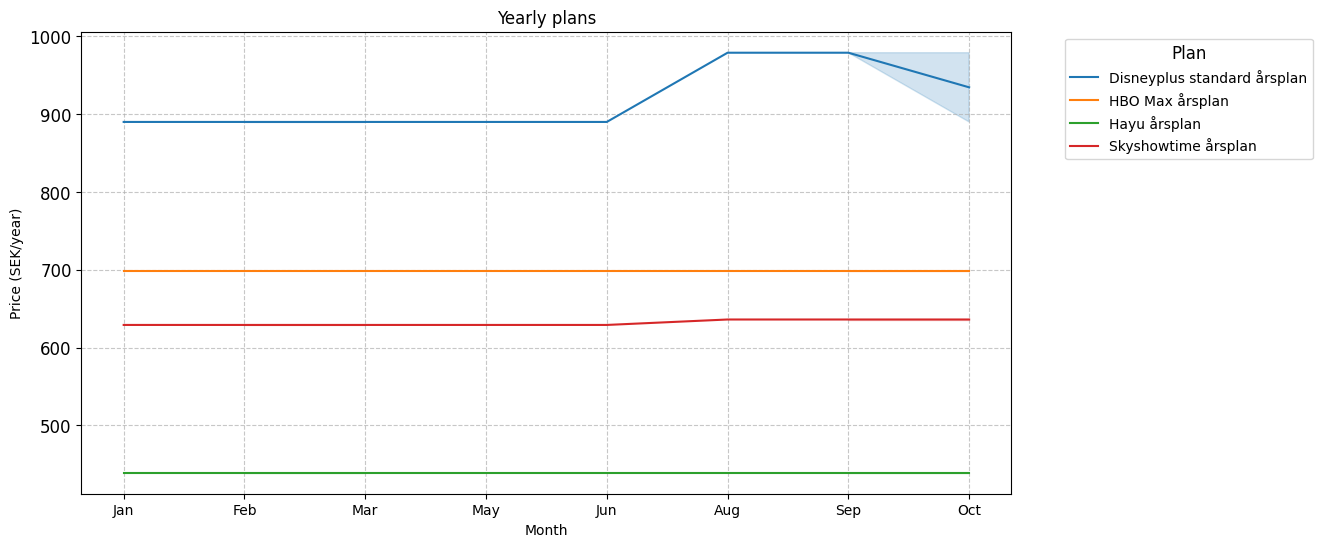

In [101]:
annual_packages = [
    124,
    137, 
    118,
    116
]

# Fixa att skyshowtime ger månadspriser till årsprenumeration
is_sky_show_time = df['ID'] == 124
later_than_july = df['Dates'].dt.month > 7
df.loc[is_sky_show_time & later_than_july, 'Price'] = 12*df.loc[is_sky_show_time & later_than_july, 'Price']


year_df = df[df["ID"].isin(annual_packages)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Yearly plans')
plt.xlabel('Month')
plt.ylabel('Price (SEK/year)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [104]:
def plot_company(id_list, company, df, country):
    df = df[df["ID"].isin(id_list)]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
    plt.title(company)
    plt.xlabel('Month')
    if country == SE:
        plt.ylabel('Price (SEK/month)')
    elif country == NO:
        plt.ylabel('Price (NOK/month)')
    elif country == FI:
        plt.ylabel('Price (€/month)')
    elif country == DK:
        plt.ylabel('Price (DKK/month)')
    legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
    legend.get_title().set_fontsize(12) 
    plt.yticks(fontsize=12)
    ax = plt.gca()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

### Viaplay

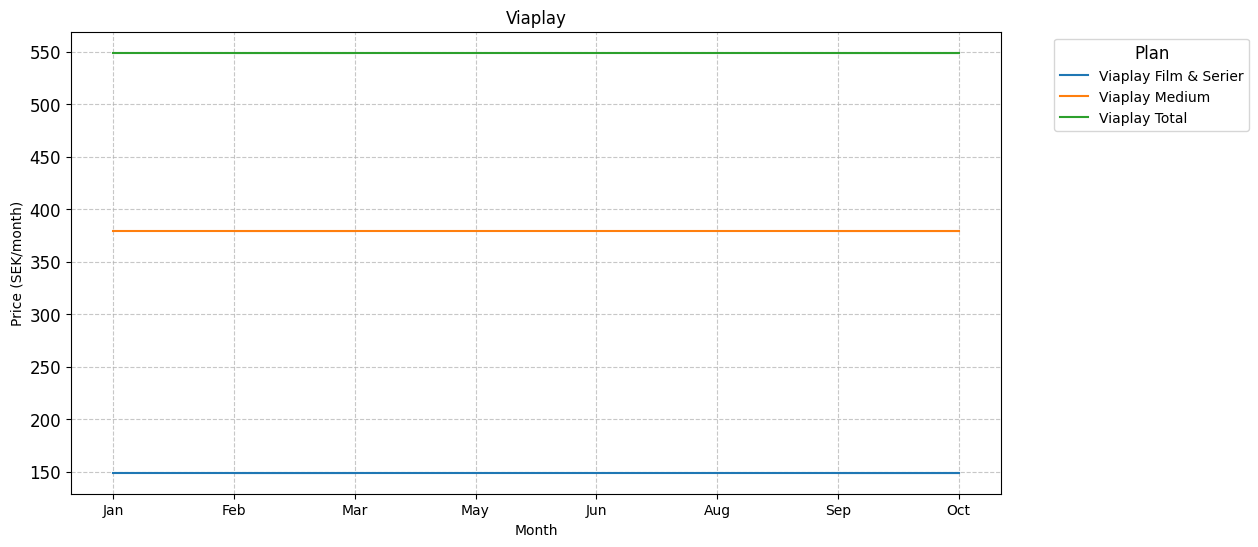

In [105]:
via = [128, 129, 130]
plot_company(via, "Viaplay", df, SE)

### Apple

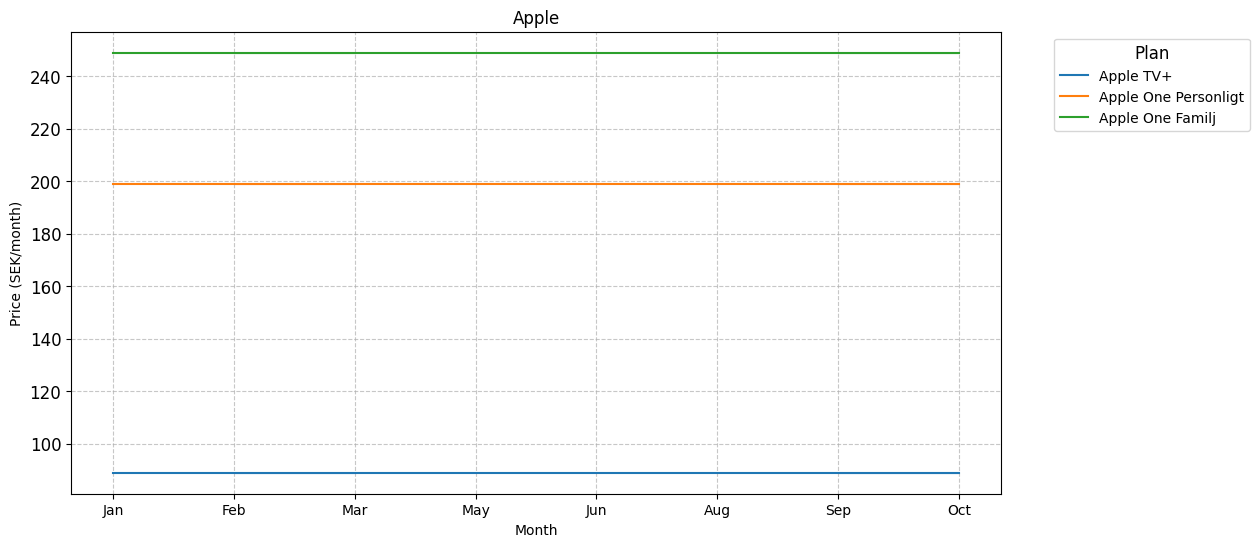

In [106]:
aapl = [101, 102, 103]
plot_company(aapl, "Apple", df, SE)

### Netflix

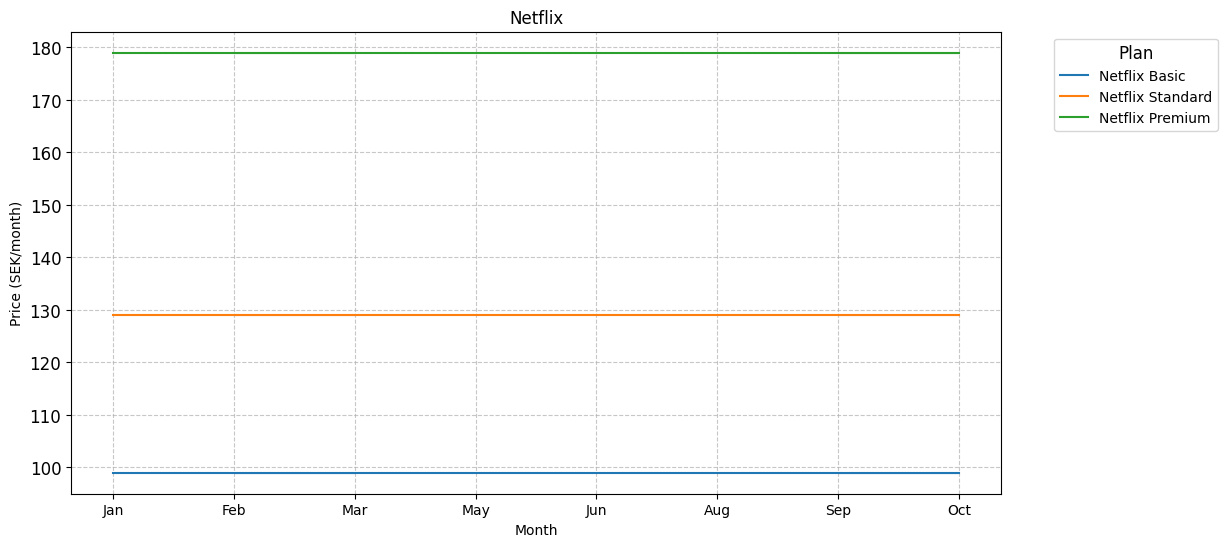

In [107]:
nflx = [119, 120, 121]
plot_company(nflx, "Netflix", df, SE)

### Discoveryplus

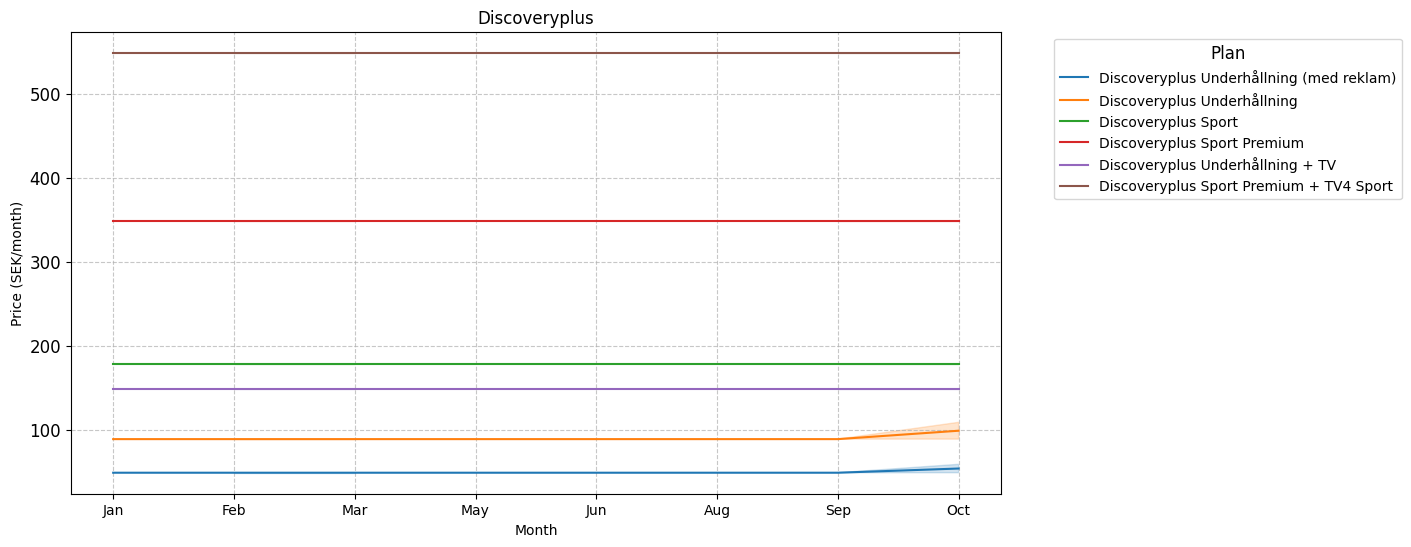

In [108]:
disc = [109, 110, 111, 112, 113, 114]
plot_company(disc, "Discoveryplus", df, SE)

### Youtube Premium

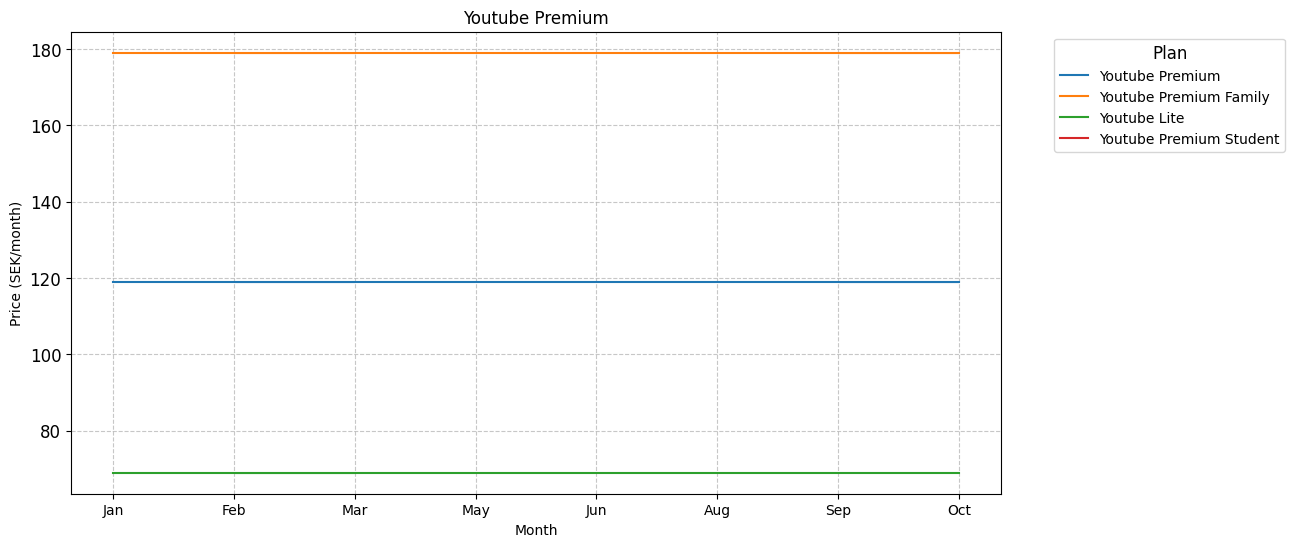

In [109]:
yt = [131, 132, 133, 138]
plot_company(yt, "Youtube Premium", df, SE)

### TV4 Play

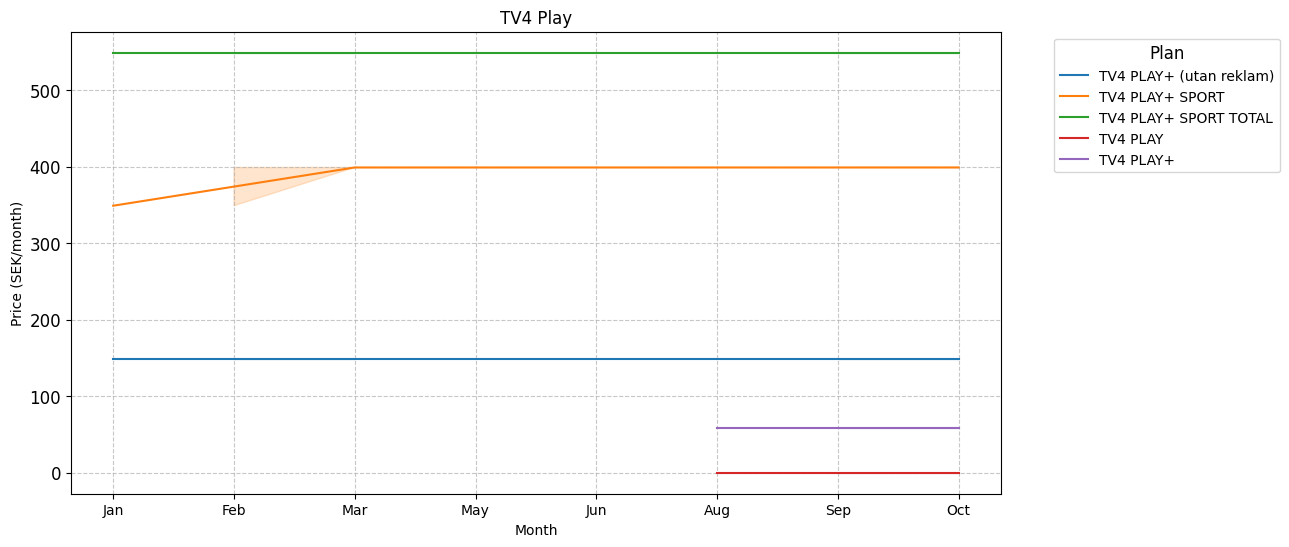

In [110]:
tv4 = [104, 105, 106, 107, 108]
plot_company(tv4, "TV4 Play", df, SE)

## Danmark

In [325]:
df = create_df(DK)
df.head()

,ID,Dates,Price,Package,month
0,440,2023-01-13,129.0,Viaplay Film & Serier,Jan
1,439,2023-01-13,449.0,Viaplay Total,Jan
2,401,2023-01-13,79.0,Netflix Basic,Jan
3,402,2023-01-13,114.0,Netflix Standard,Jan
4,403,2023-01-13,149.0,Netflix Premium,Jan


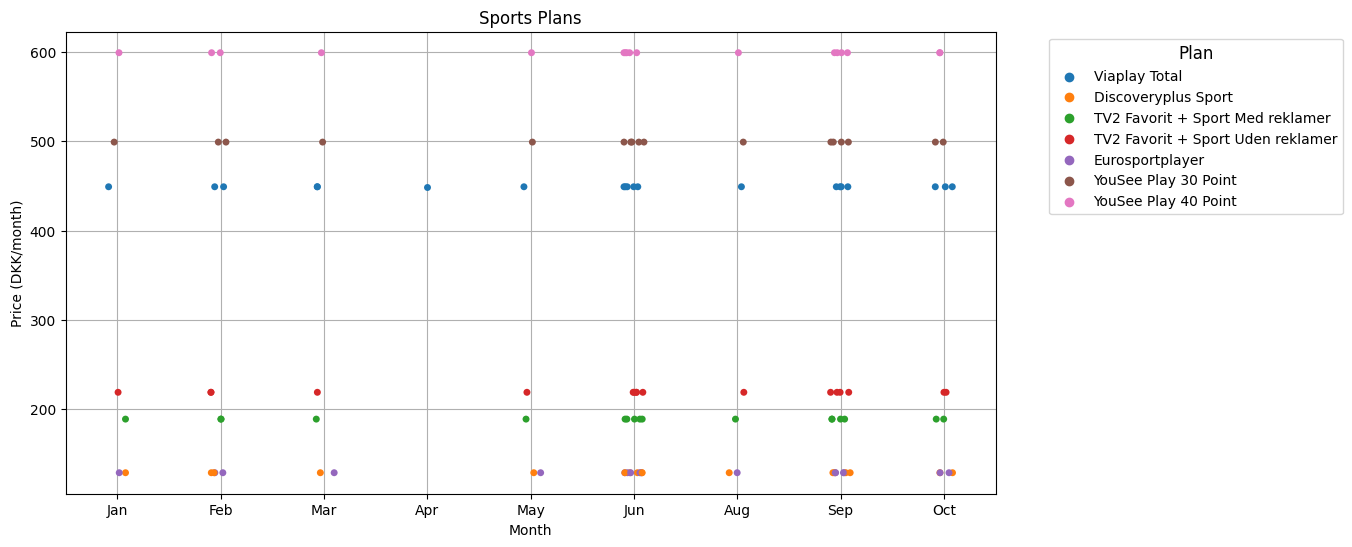

In [326]:
contains_sport = df['Package'].str.contains('sport', case=False)
is_vp_tot = df['ID'] == 439
is_yousee = df['ID'].isin([436, 437])
sports = contains_sport | is_vp_tot | is_yousee
sport_df = df[sports]

fig = plt.figure(figsize=(12, 6))
sns.stripplot(data=sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
#sns.lineplot(data=sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.title('Sports Plans')
plt.xlabel('Month')
plt.ylabel('Price (DKK/month)')
plt.grid(True)
plt.show()

### Utan Sport

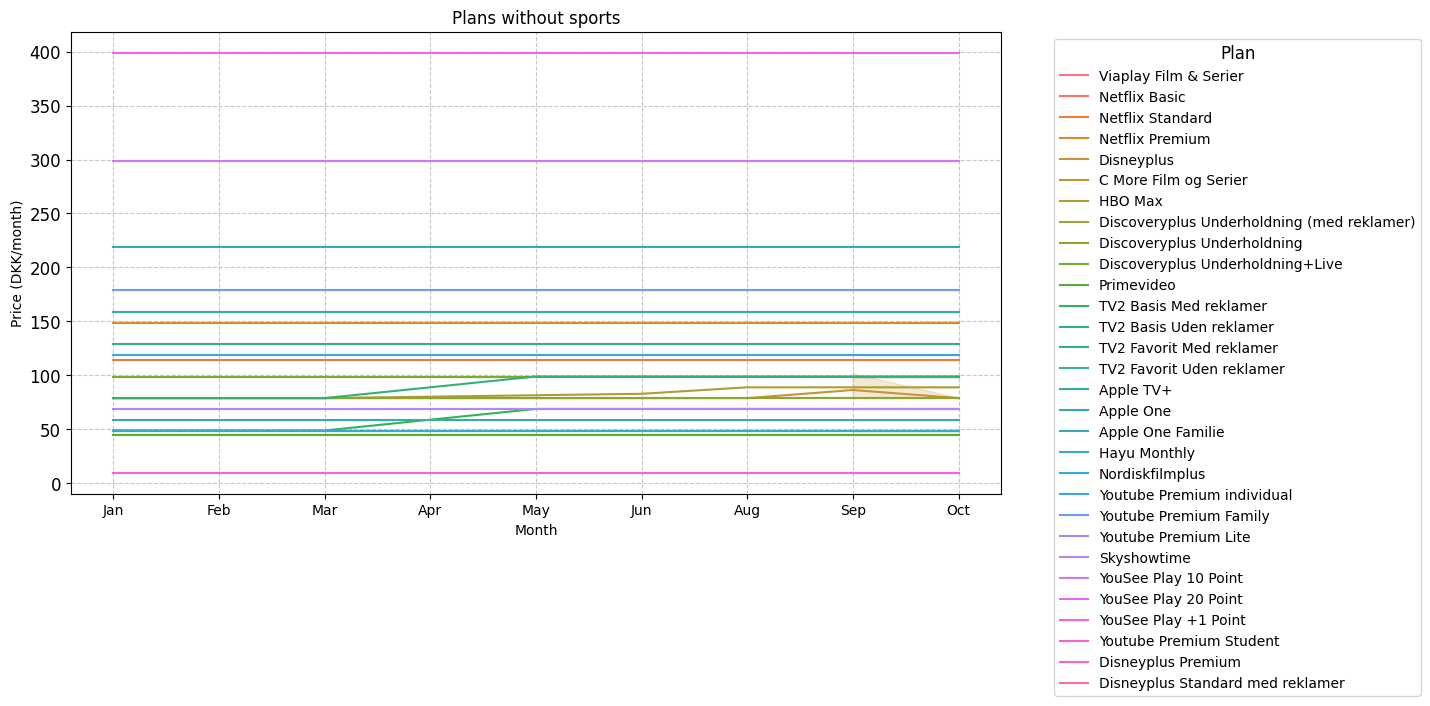

In [327]:
non_month_packages = [405, 442, 433, 427, 426, 408]
no_sport_df = df[~sports & ~df["ID"].isin(non_month_packages)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=no_sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Plans without sports')
plt.xlabel('Month')
plt.ylabel('Price (DKK/month)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Basplaner

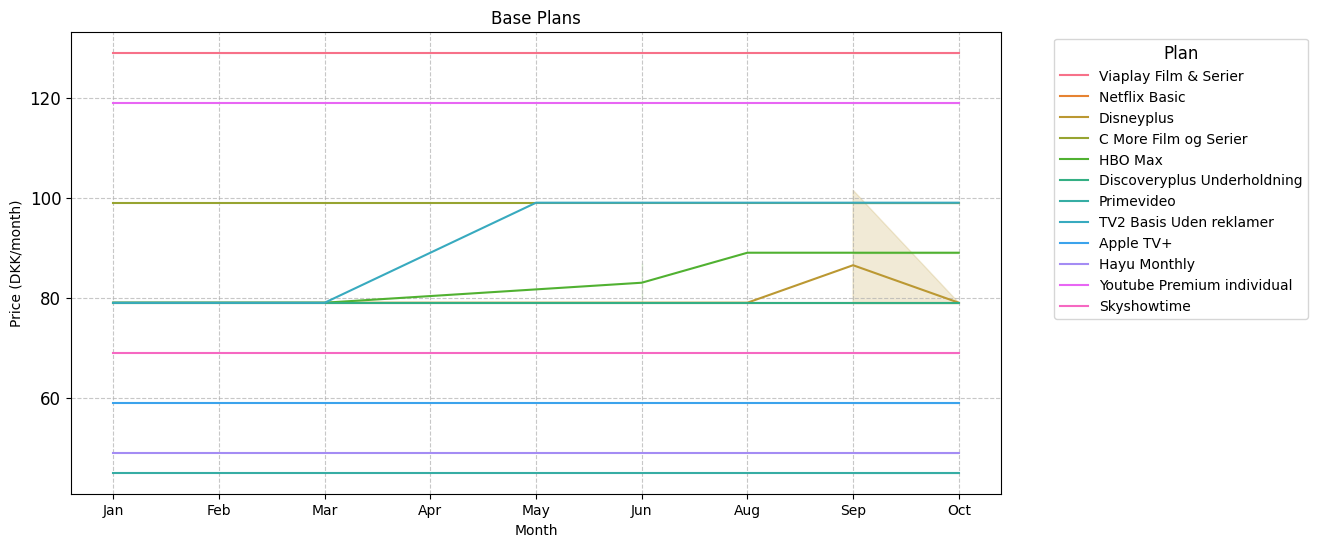

In [167]:
base_packages = [401, 404, 406, 407, 410, 413, 415, 420, 425, 429, 432, 440]
base_df = df[df['ID'].isin(base_packages)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=base_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Base Plans')
plt.xlabel('Month')
plt.ylabel('Price (DKK/month)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Årsplaner

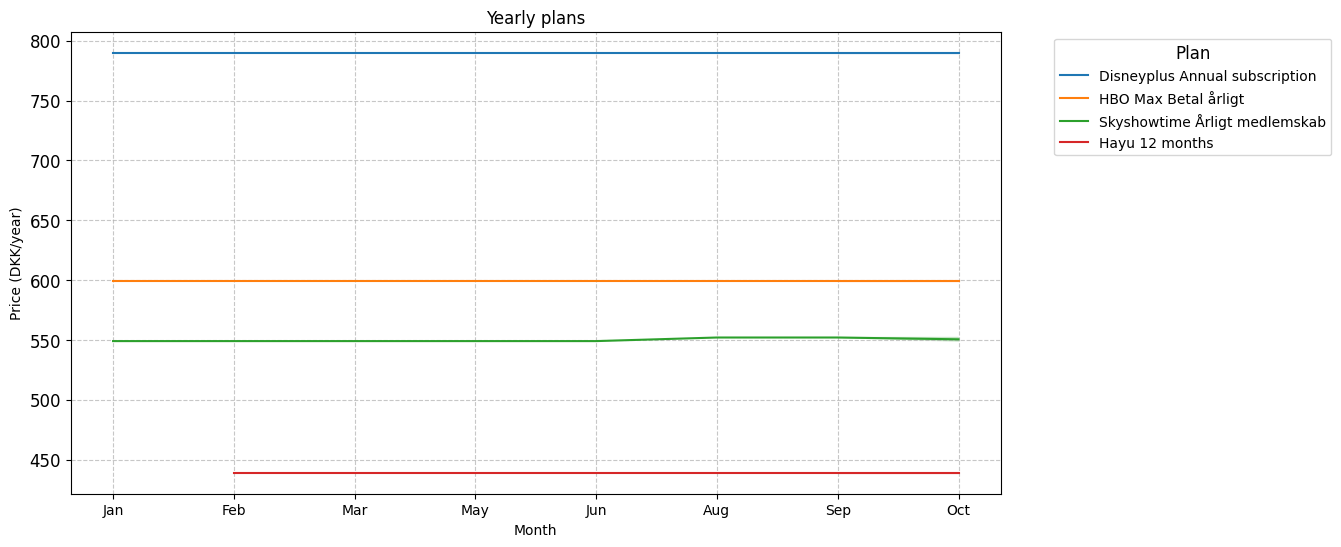

In [174]:
annual_packages = [405, 408, 427, 433]
year_df = df[df["ID"].isin(annual_packages)]

# Fixa att skyshowtime ger månadspriser till årsprenumeration

is_sky_show_time = year_df['ID'] == 433
when =  (year_df['Dates'] < datetime.datetime(2023, 10, 2)) & (year_df['Dates'].dt.month > 7)
year_df.loc[is_sky_show_time & when, 'Price'] = 12* year_df.loc[is_sky_show_time & when, 'Price']


plt.figure(figsize=(12, 6))
sns.lineplot(data=year_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Yearly plans')
plt.xlabel('Month')
plt.ylabel('Price (DKK/year)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Apple

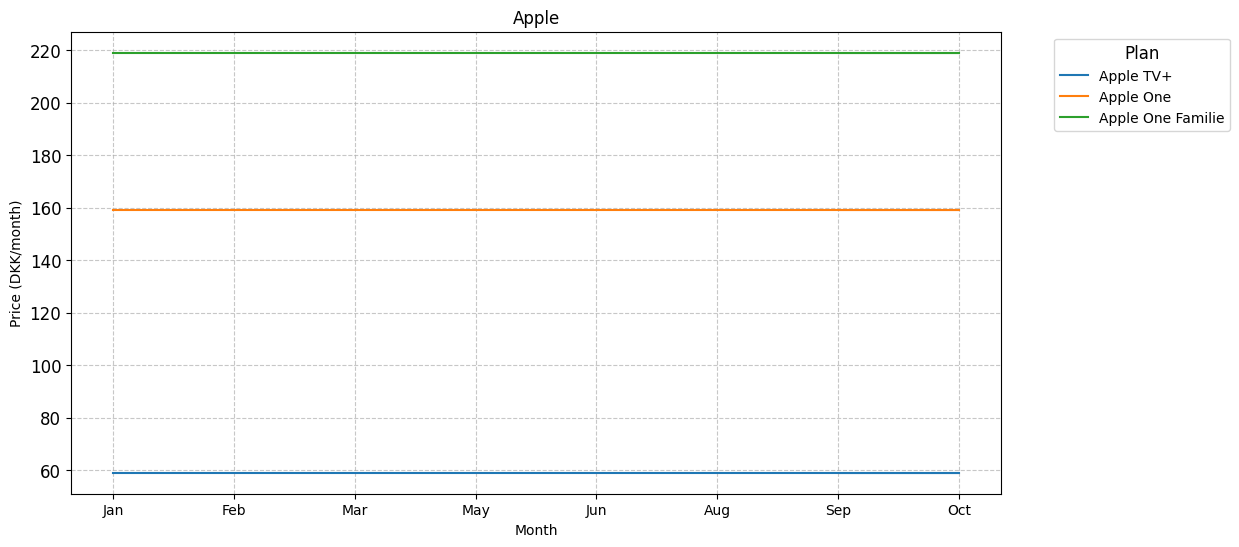

In [177]:
plot_company([420, 421, 423], "Apple", df,  DK)

### Netflix

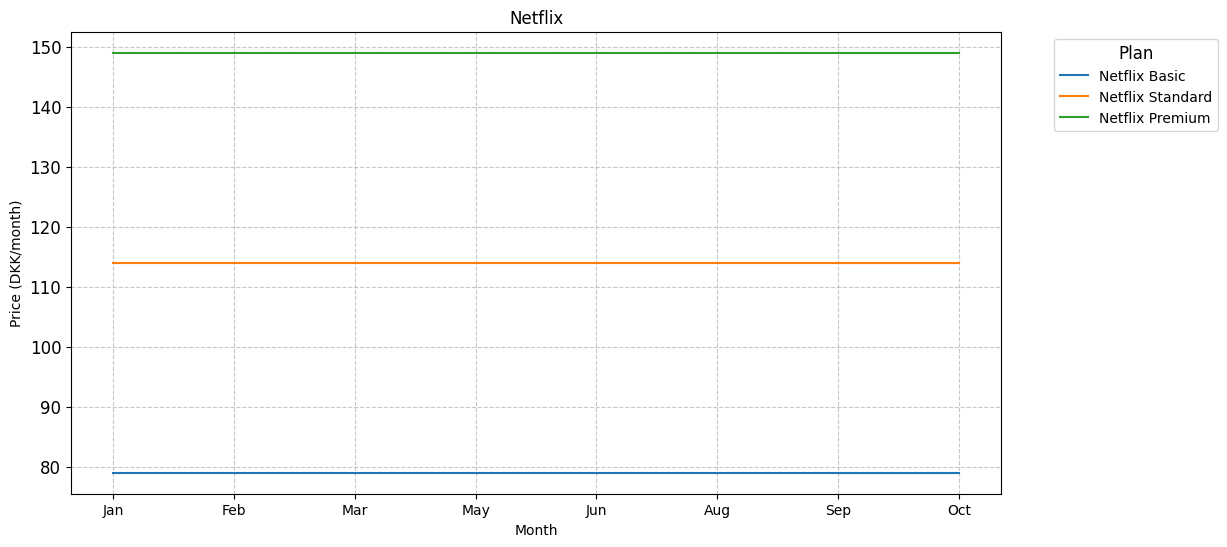

In [181]:
plot_company([401, 402, 403], "Netflix", df,  DK)

### Discoveryplus

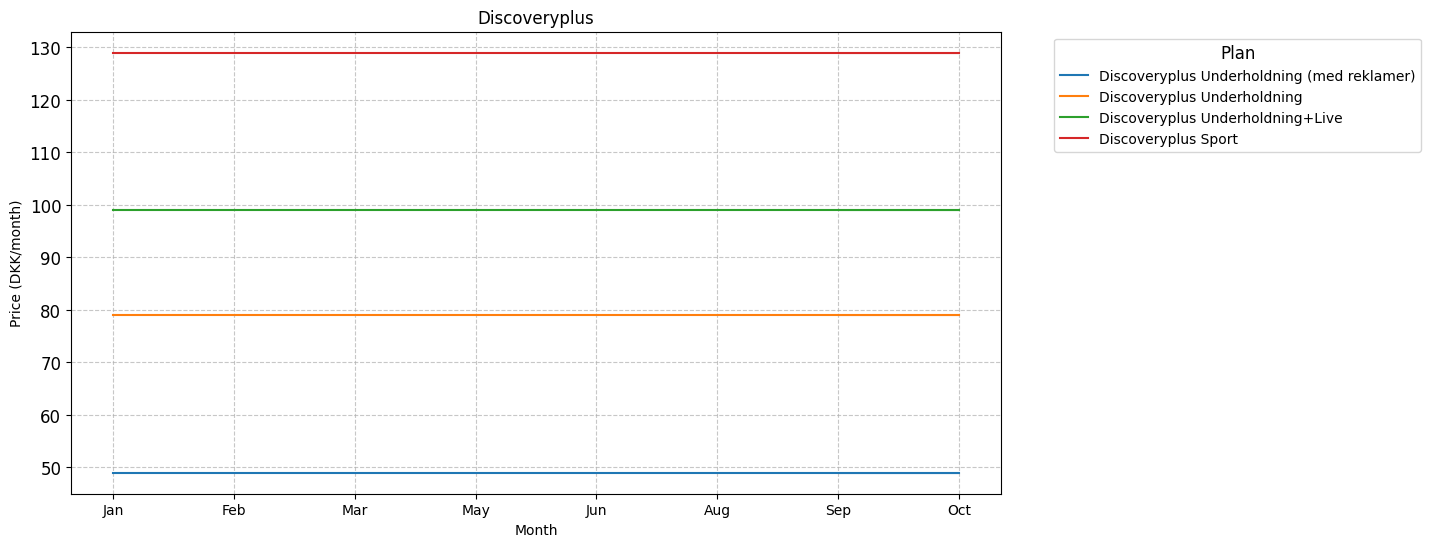

In [180]:
plot_company([409, 410, 411, 412], "Discoveryplus", df,  DK)

### TV2

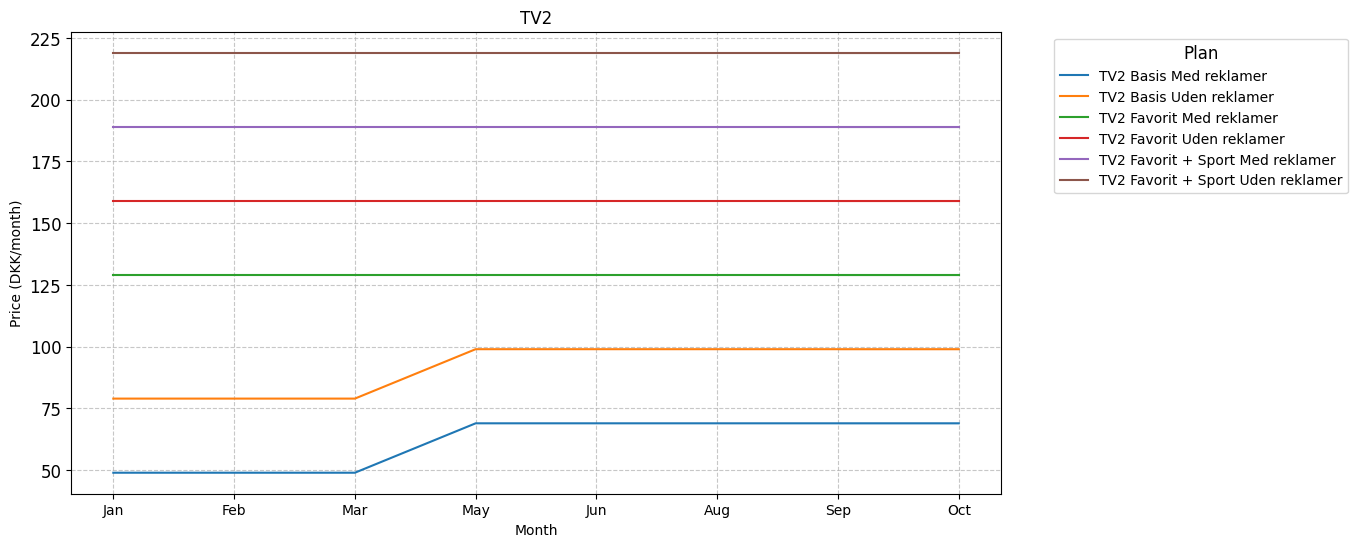

In [183]:
plot_company([414, 415, 416, 417, 418, 419], "TV2", df,  DK)

### Youtube

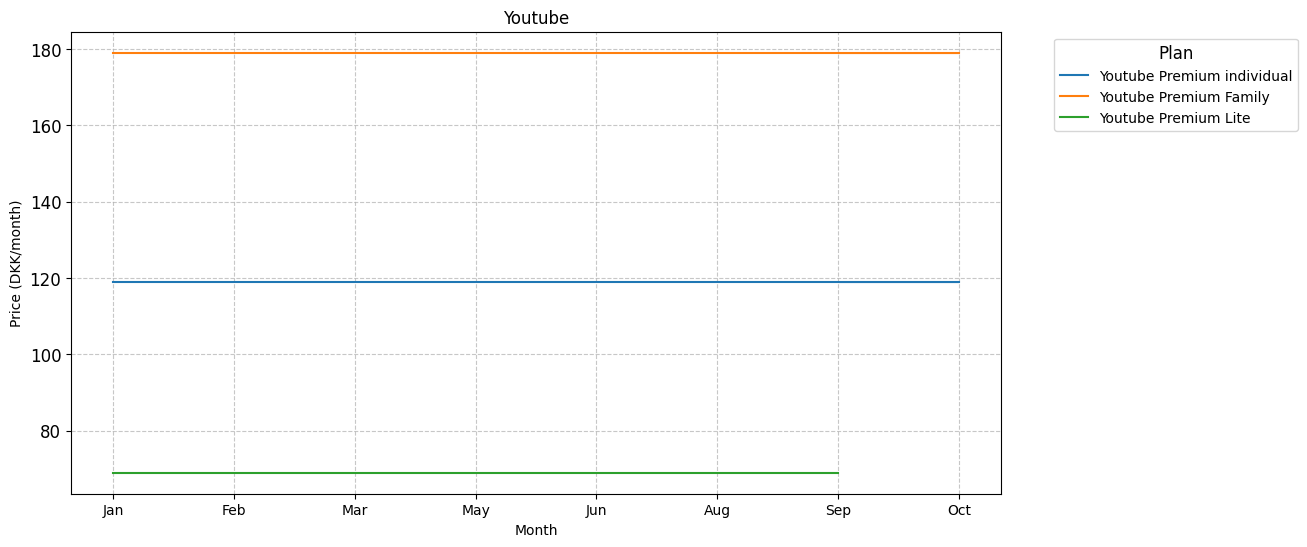

In [184]:
plot_company([429, 430, 431], "Youtube", df,  DK)

### YouSee

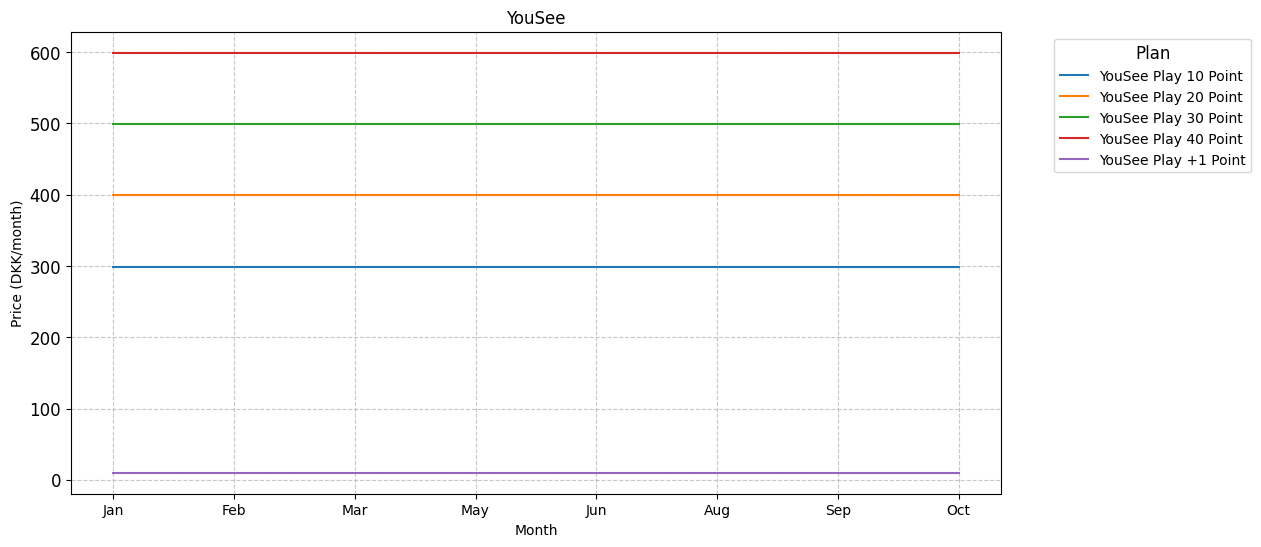

In [186]:
plot_company([434, 435, 436, 437, 438], "YouSee", df,  DK)

# Finland

In [272]:
df = create_df(FI)

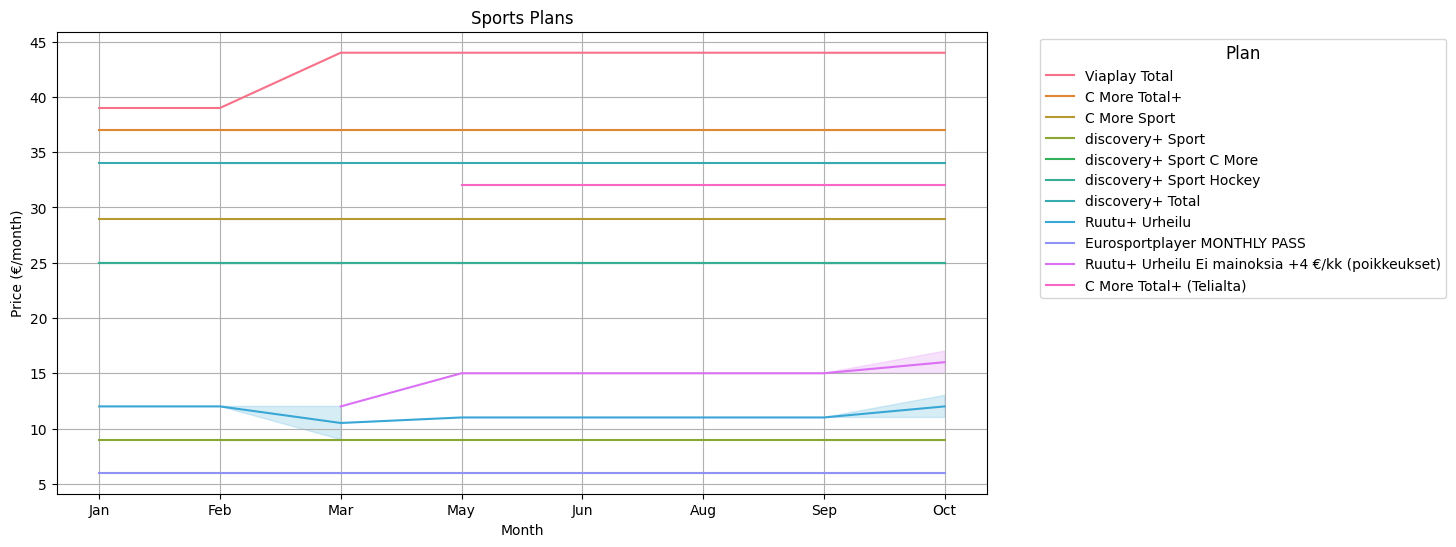

In [273]:
contains_sport = df['Package'].str.contains('sport', case=False)
is_vp = df['ID'] == 219
is_disc = df['ID'] == 216
is_ruutu_sport = df['ID'].isin([227, 229])
is_cmore_sport = df['ID'].isin([205, 208])
sports = contains_sport | is_vp | is_ruutu_sport | is_cmore_sport | is_disc
sport_df = df[sports]
fig = plt.figure(figsize=(12, 6))
#sns.stripplot(data=sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
sns.lineplot(data=sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.title('Sports Plans')
plt.xlabel('Month')
plt.ylabel('Price (€/month)')
plt.grid(True)
plt.show()
   

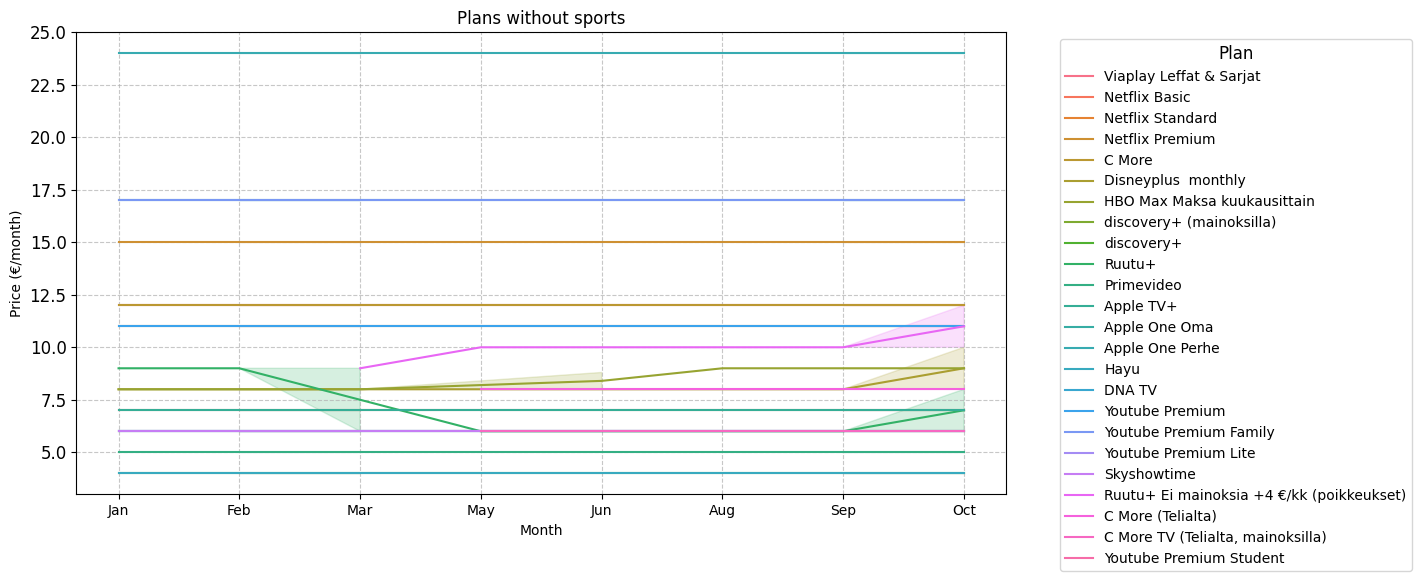

In [274]:
non_month_packages = [218, 222, 232, 216]
no_sport_df = df[~sports & ~df["ID"].isin(non_month_packages)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=no_sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Plans without sports')
plt.xlabel('Month')
plt.ylabel('Price (€/month)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


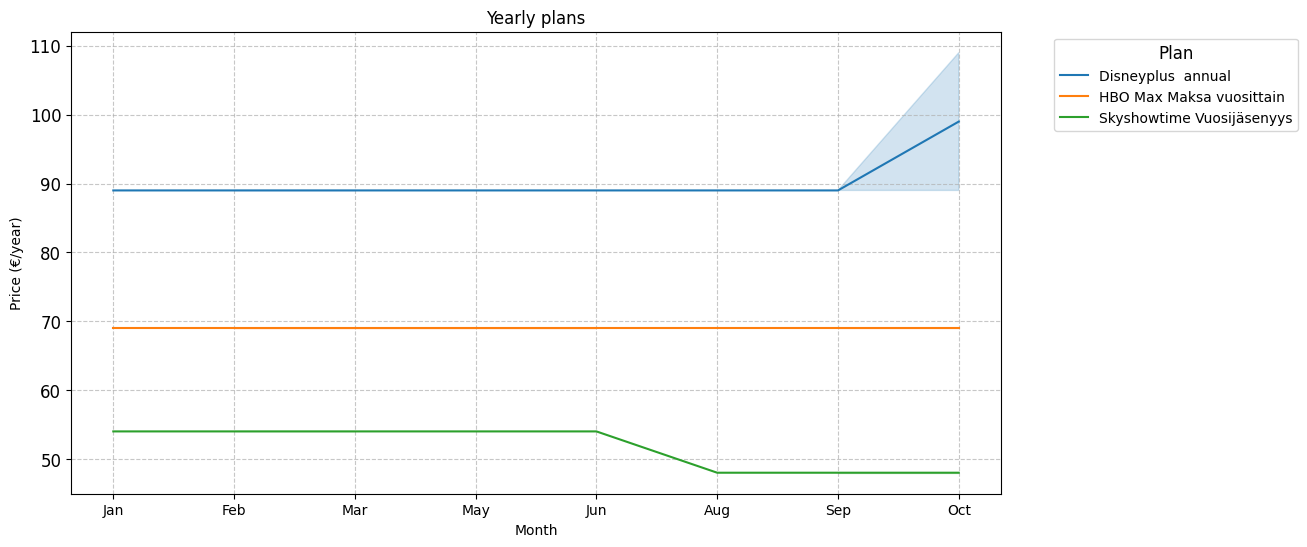

In [275]:
annual_packages = [
    218,
    222,
    232,
]

is_sky_show_time = df['ID'] == 232
later_than_june = df['Dates'].dt.month > 6
df.loc[is_sky_show_time & later_than_june, 'Price'] = 12*df.loc[is_sky_show_time & later_than_june, 'Price']
year_df = df[df["ID"].isin(annual_packages)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Yearly plans')
plt.xlabel('Month')
plt.ylabel('Price (€/year)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

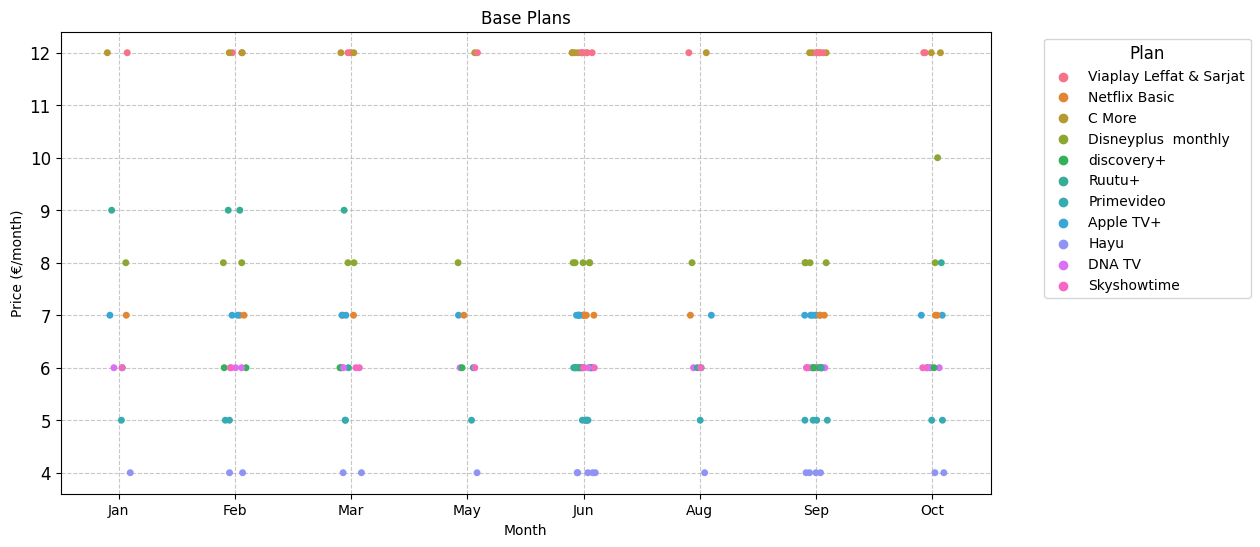

In [277]:
base_packages = [
    201,
    204,
    210,
    212,
    217,
    220,
    223,
    226,
    230,
    231,
    237
]

base_df = df[df['ID'].isin(base_packages)]
plt.figure(figsize=(12, 6))
sns.stripplot(data=base_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Base Plans')
plt.xlabel('Month')
plt.ylabel('Price (€/month)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Apple

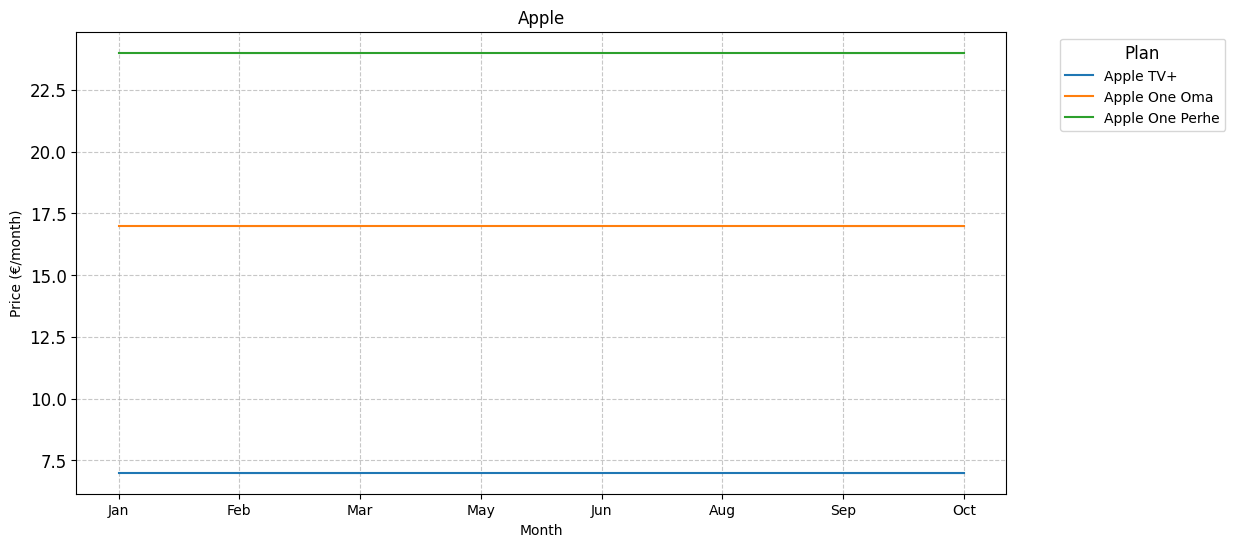

In [191]:
plot_company([201, 202, 203], "Apple", df,  FI)

### C More

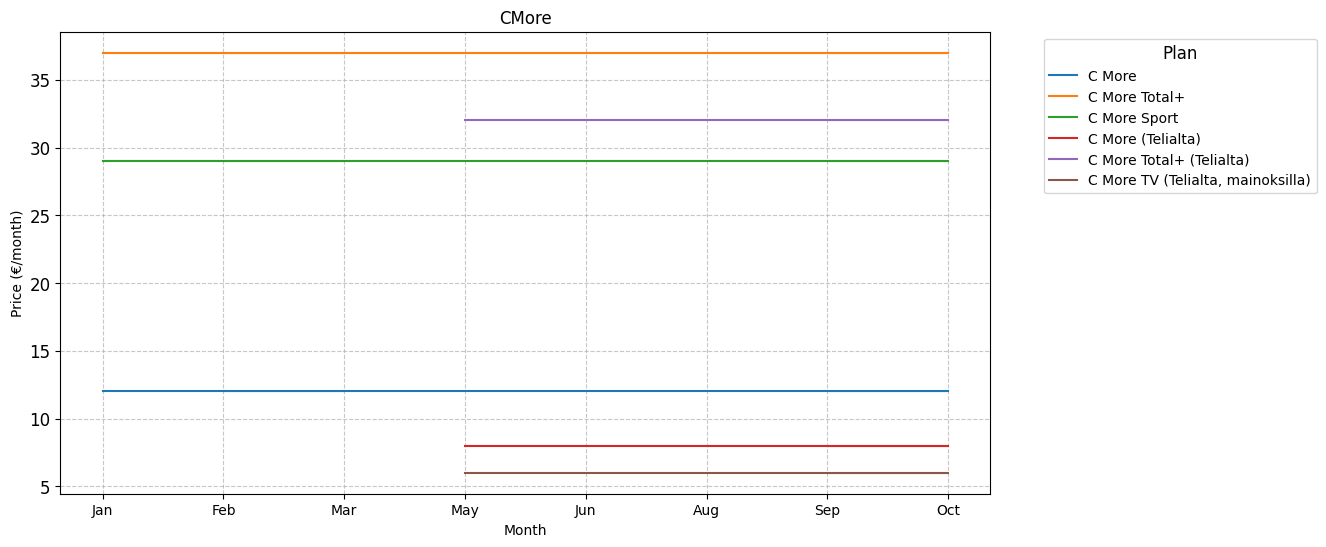

In [193]:
plot_company([204, 205, 206, 207, 208, 209], "CMore", df,  FI)

### Discoveryplus

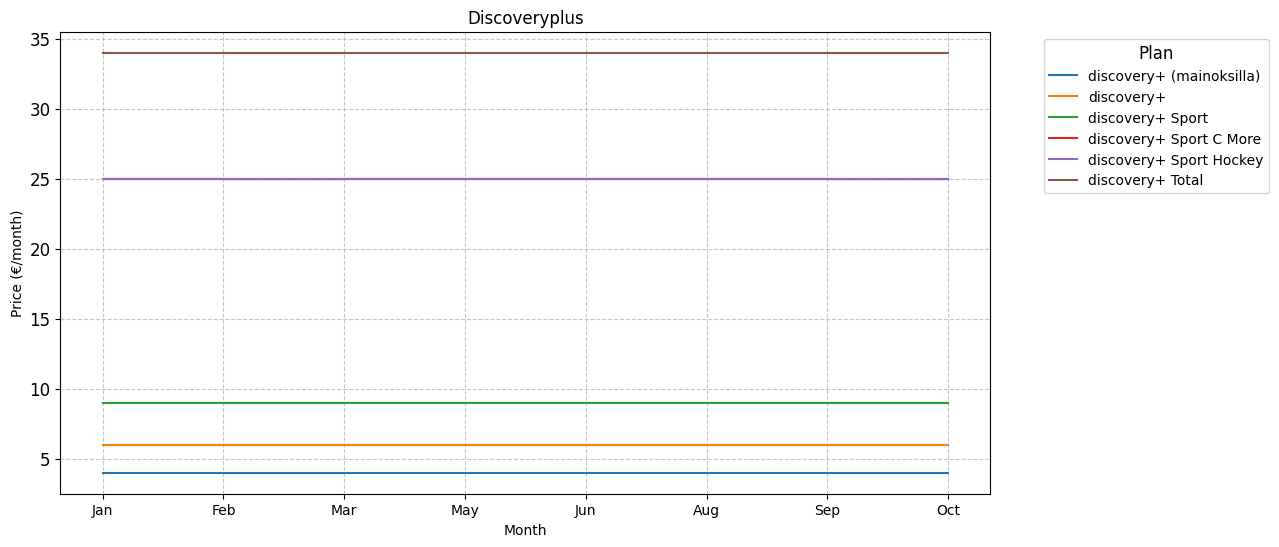

In [194]:
plot_company([211, 212, 213, 214, 215, 216],  "Discoveryplus", df,  FI)

### Netflix

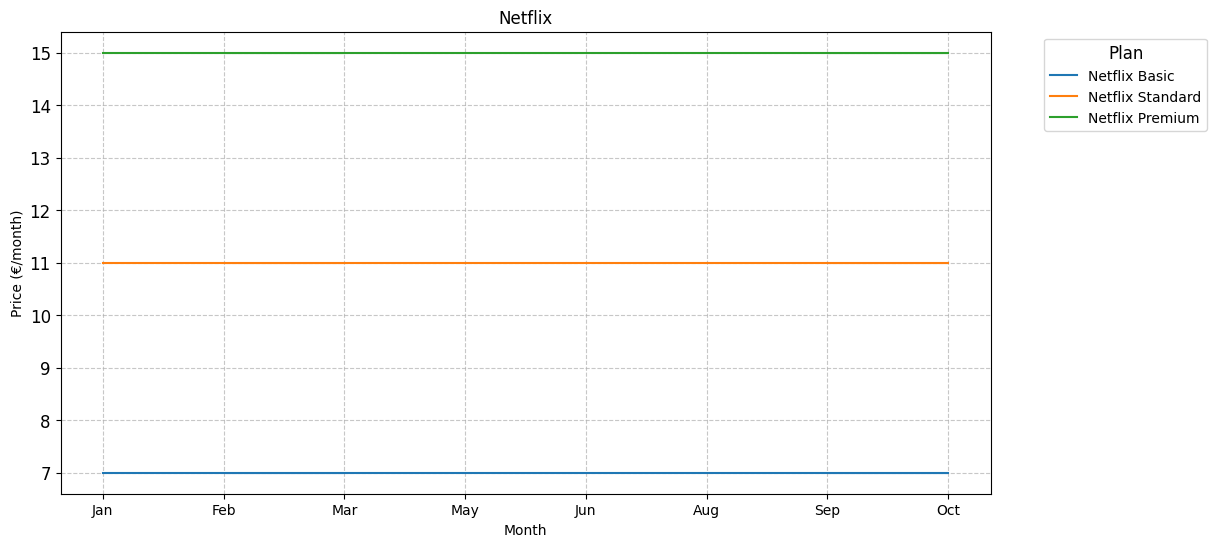

In [195]:
plot_company([223, 224, 225],  "Netflix", df,  FI)

### Ruutu

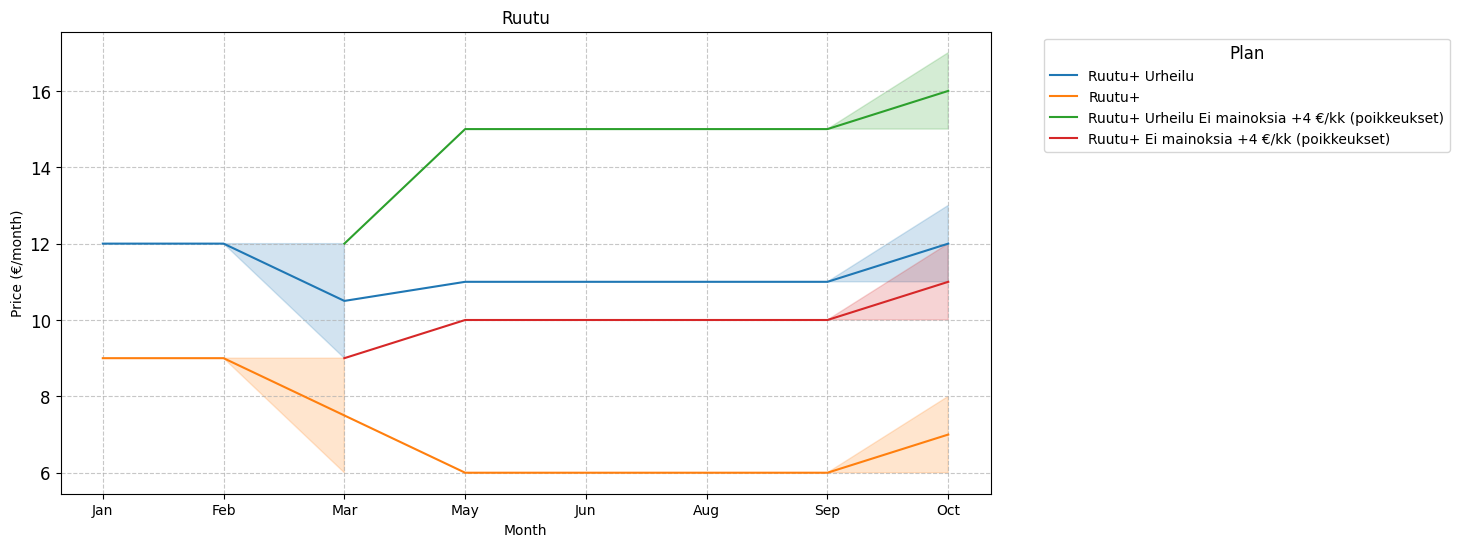

In [196]:
plot_company([227, 228, 229, 230],  "Ruutu", df,  FI)

### Youtube Premium

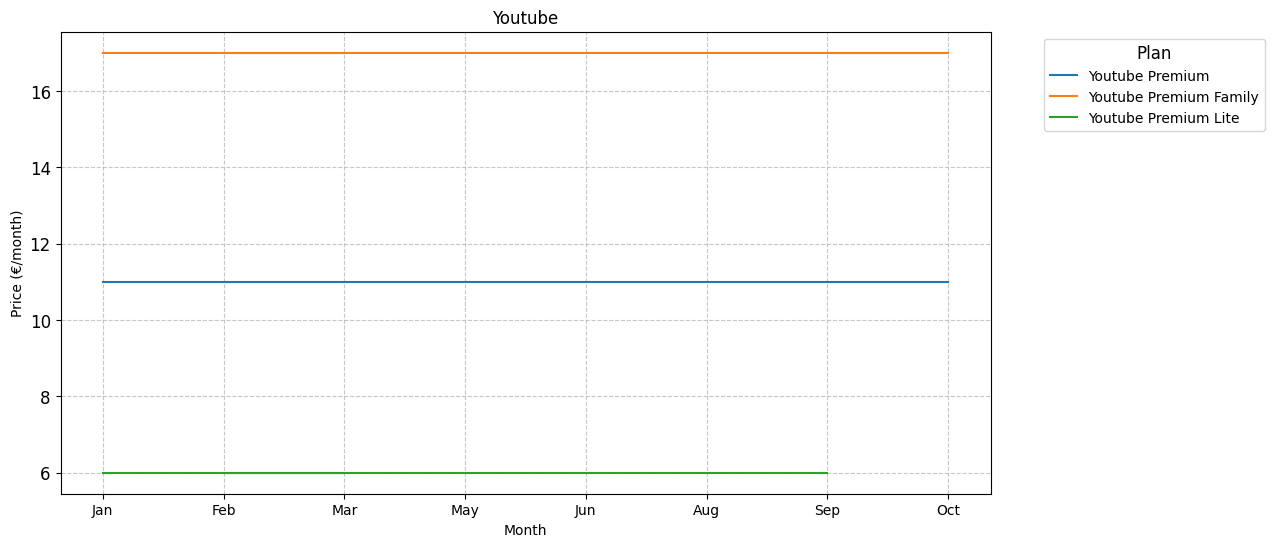

In [198]:
plot_company([233, 234, 235],  "Youtube", df,  FI)

# Norge

In [303]:
df = create_df(NO)

### Sport

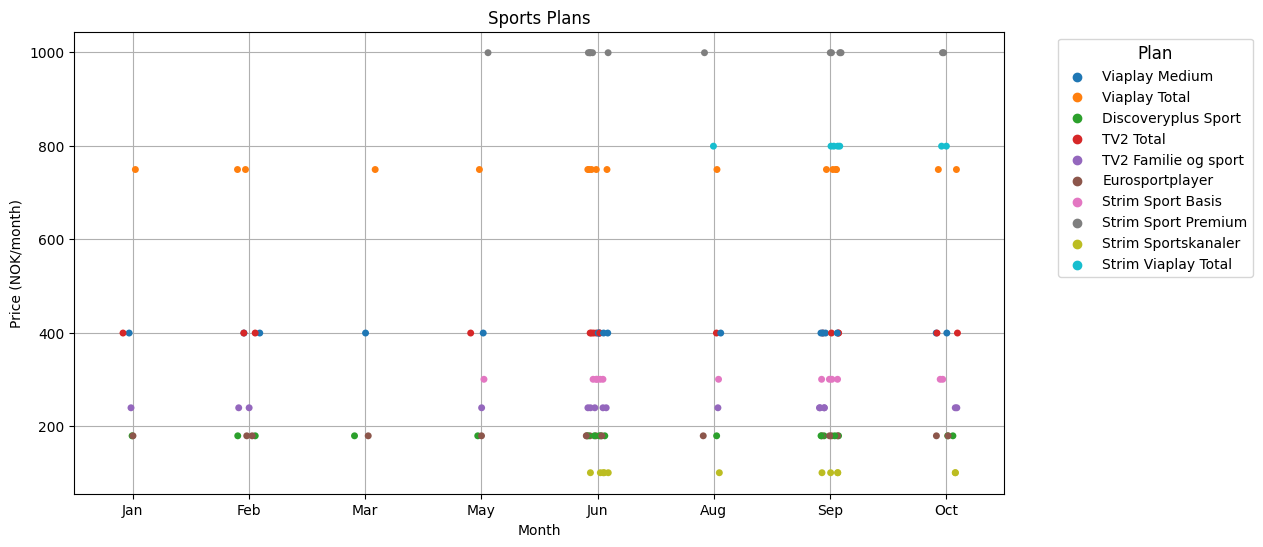

In [317]:
contains_sport = df['Package'].str.contains('sport', case=False)
is_vp_med = df["ID"] == 332
is_vp_tot = df["ID"] == 334
is_tv2_sport = df['ID'].isin([325, 324])
is_strim_sport = df["ID"].isin([320, 321, 322, 323])
sports = contains_sport | is_vp_med | is_vp_tot | is_strim_sport | is_tv2_sport
sport_df = df[sports]
fig = plt.figure(figsize=(12, 6))
sns.stripplot(data=sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
#sns.lineplot(data=sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.title('Sports Plans')
plt.xlabel('Month')
plt.ylabel('Price (NOK/month)')
plt.grid(True)
plt.show()
   

### No Sport

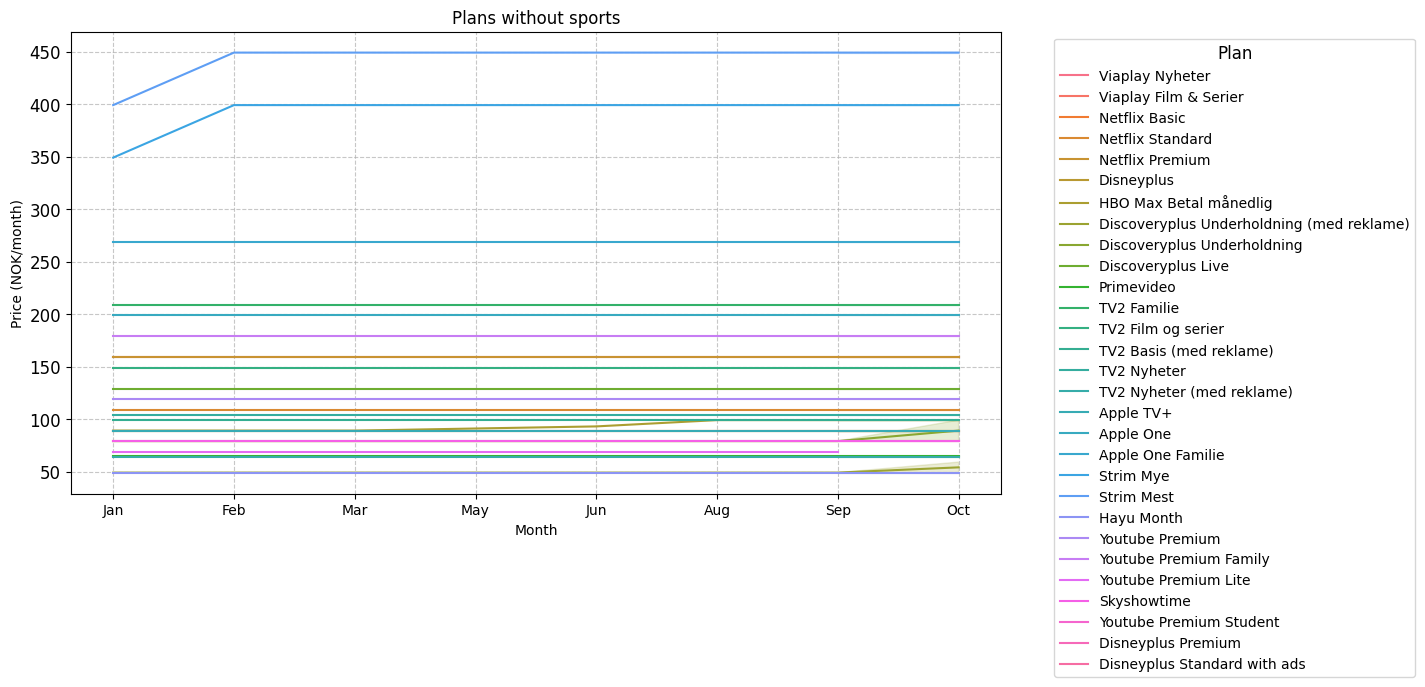

In [318]:
non_month_packages = [309, 311, 317, 339, 342]
no_sport_df = df[~sports & ~df["ID"].isin(non_month_packages)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=no_sport_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Plans without sports')
plt.xlabel('Month')
plt.ylabel('Price (NOK/month)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Base Plans

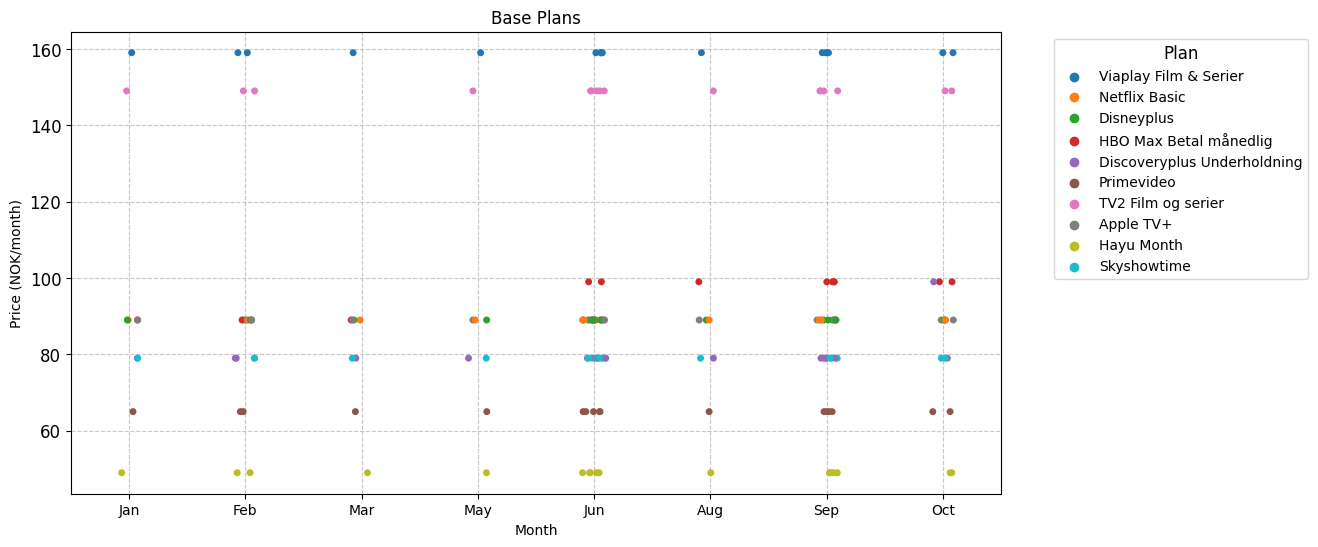

In [319]:
base_packages = [
    301,
    305,
    308, 
    310,
    312,
    315,
    316,
    327,
    333,
    340
]

base_df = df[df['ID'].isin(base_packages)]
plt.figure(figsize=(12, 6))
sns.stripplot(data=base_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Base Plans')
plt.xlabel('Month')
plt.ylabel('Price (NOK/month)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Year Plans

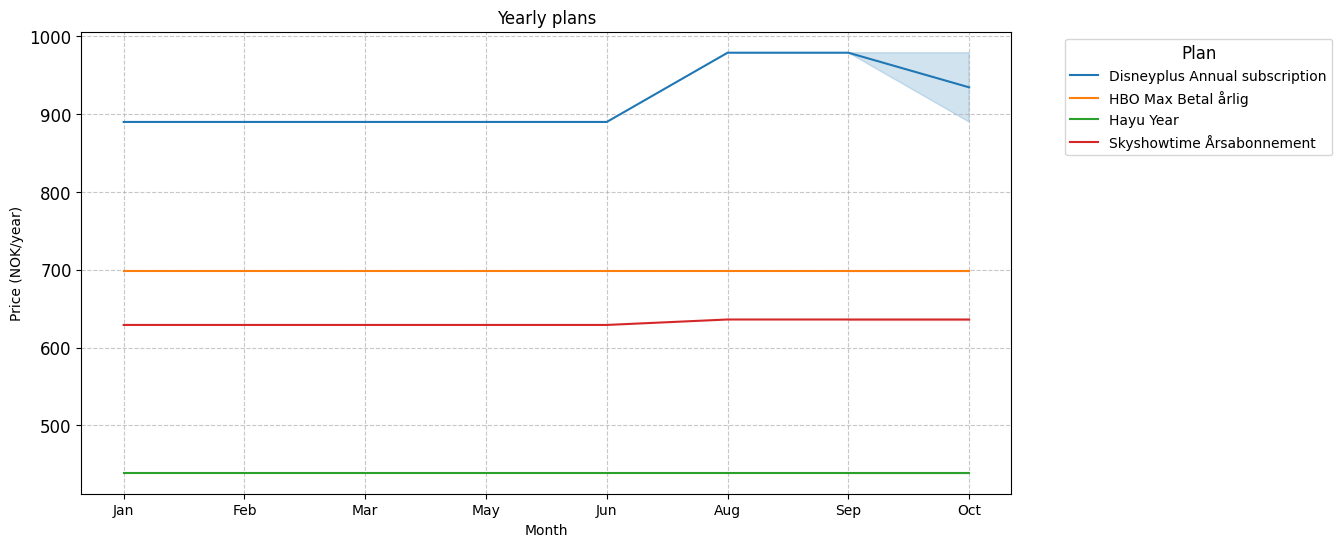

In [322]:
annual_packages = [
    311,
    317,
    339,
    309
]


# Fixa att skyshowtime ger månadspriser till årsprenumeration
is_sky_show_time = df['ID'] == 317
later_than_july = df['Dates'].dt.month > 6
df.loc[is_sky_show_time & later_than_july, 'Price'] = 12*df.loc[is_sky_show_time & later_than_july, 'Price']

year_df = df[df["ID"].isin(annual_packages)]
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_df[['month', 'Price', 'Package']], x='month', y='Price', hue='Package')
plt.title('Yearly plans')
plt.xlabel('Month')
plt.ylabel('Price (NOK/year)')
legend = plt.legend(title='Plan', loc='upper left', bbox_to_anchor=(1.05, 1))
legend.get_title().set_fontsize(12) 
plt.yticks(fontsize=12)
ax = plt.gca()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Apple

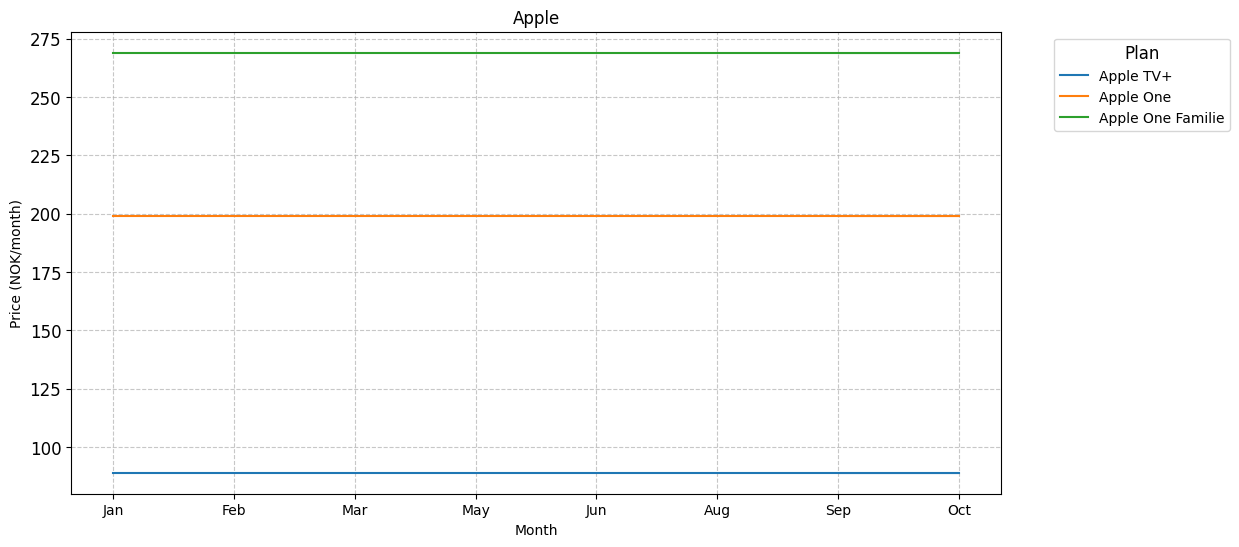

In [304]:
plot_company([301, 302, 303],  "Apple", df,  NO)

### Discoveryplus

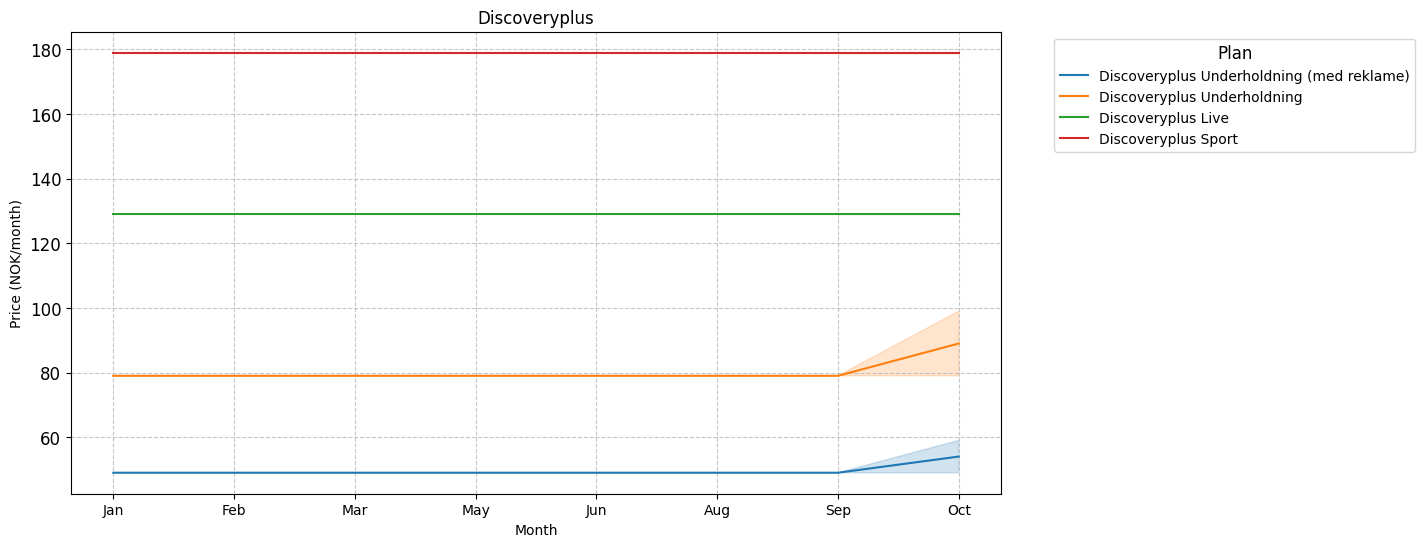

In [305]:
plot_company([304, 305, 306,307],  "Discoveryplus", df,  NO)

### Netflix

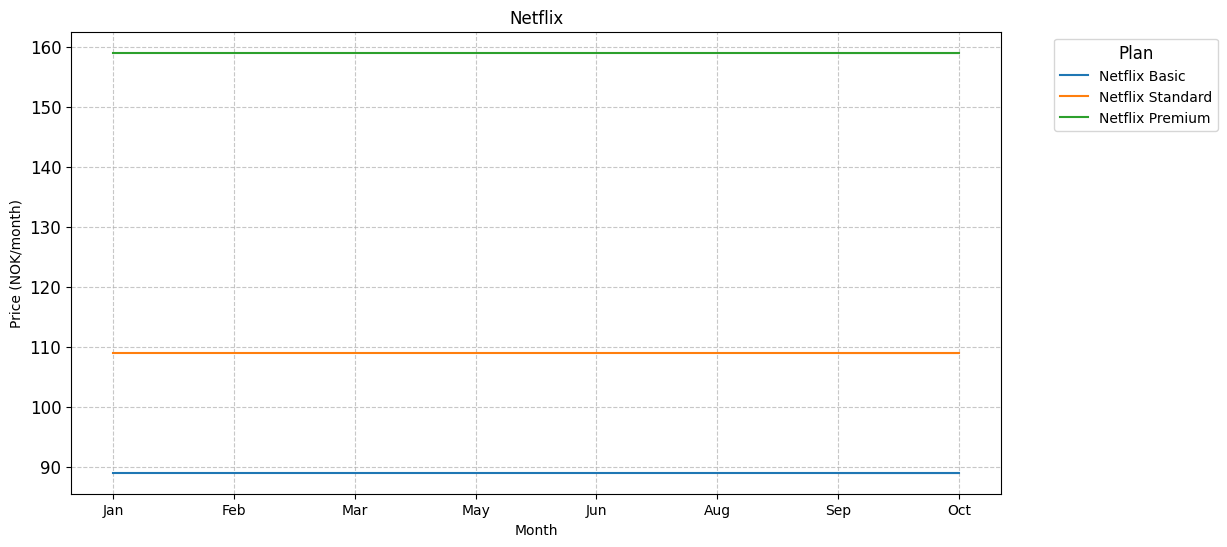

In [306]:
plot_company([312, 313, 314],  "Netflix", df,  NO)

### Strim

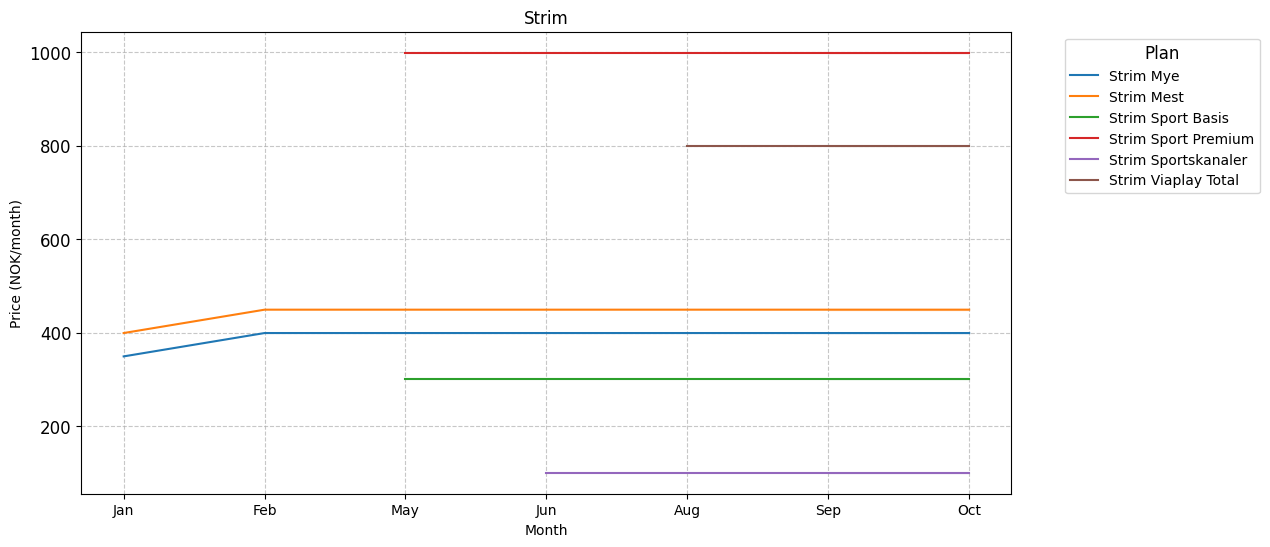

In [323]:
plot_company([318, 319, 320, 321, 322, 323],  "Strim", df,  NO)

### TV2

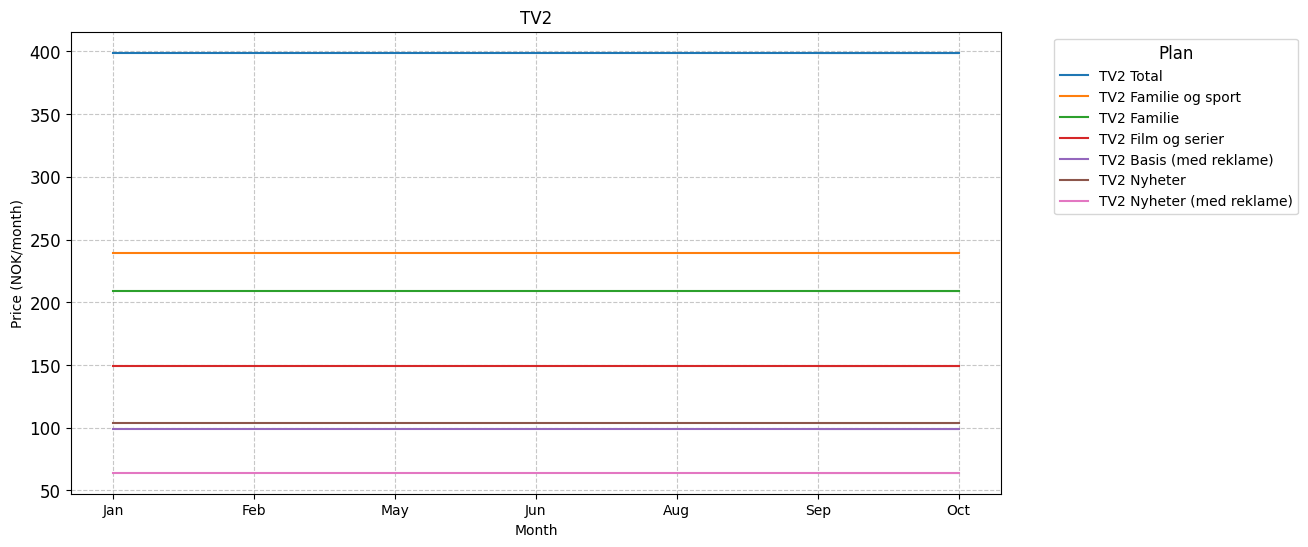

In [307]:
plot_company([324, 325, 326, 327, 328, 329, 330],  "TV2", df,  NO)

### Viaplay

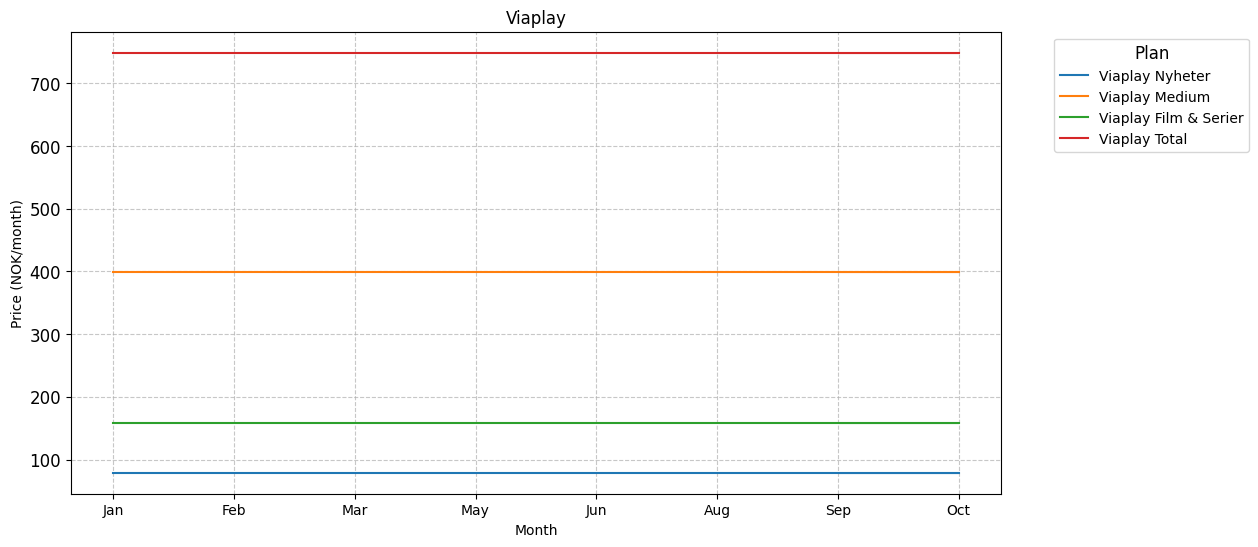

In [308]:
plot_company([331, 332, 333, 334],  "Viaplay", df,  NO)

### Youtube Premium

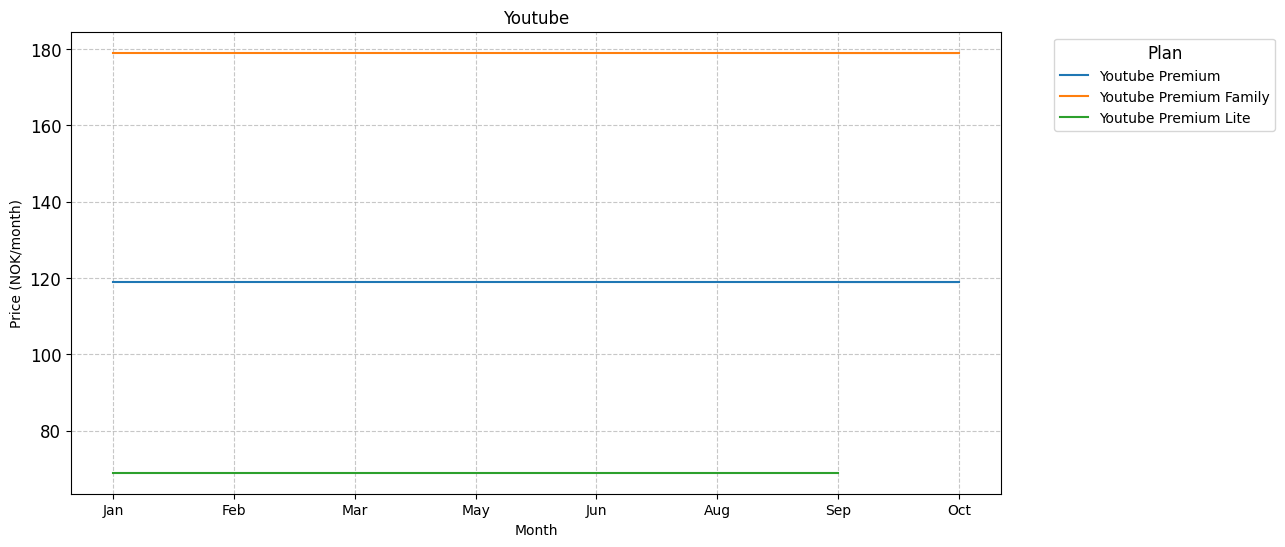

In [309]:
plot_company([335, 336, 337],  "Youtube", df,  NO)